In [36]:
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [11]:
training_data=pd.read_csv('./data/toy_dataset.csv')

In [29]:
training_data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [69]:
training_data=training_data.drop(columns=['CustomerID'])

KeyError: "['CustomerID'] not found in axis"

In [32]:
training_data.columns

Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')

In [45]:
train=training_data.apply(LabelEncoder().fit_transform)
data,labels=train.values,train.columns

# K-means clustering algorithm

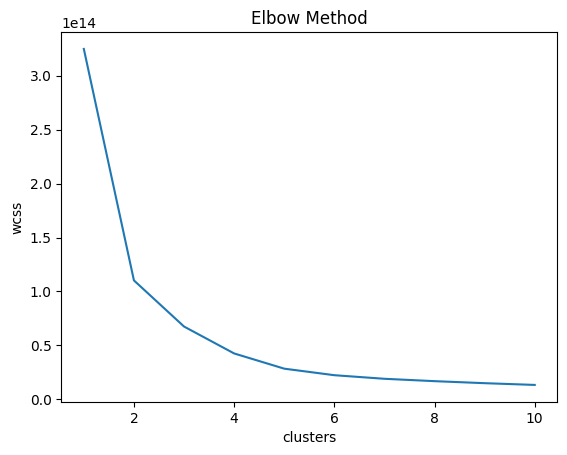

In [58]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()


In [55]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=4)

In [56]:
kmeans_results=kmeans.predict(reduced_data)
kmeans_clusters = unique(kmeans_results)

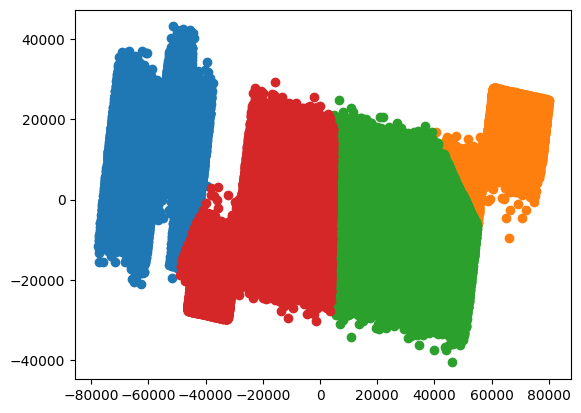

In [57]:
for cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_results == cluster)
    # make the plot
    plt.scatter(reduced_data[index, 0], reduced_data[index, 1])

# show the DBSCAN plot
plt.show()

BIRCH algorithm

In [60]:
from sklearn.cluster import Birch

In [62]:
wcss = []
for i in range(1, 11):
    km = Birch(n_clusters=i)
    km.fit(data)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

MemoryError: Unable to allocate 83.8 GiB for an array with shape (11249925000,) and data type float64

In [63]:
reduced_data = PCA(n_components=2).fit_transform(data)
Birch_model = Birch(n_clusters=4)
Birch_model.fit(reduced_data)

MemoryError: Unable to allocate 83.8 GiB for an array with shape (11249775001,) and data type float64

In [68]:
reduced_data.shape

(150000, 2)

In [ ]:
kmeans_results=Birch_model.predict(reduced_data)
kmeans_clusters = unique(kmeans_results)

Rock algorithm

Cure algorithm

Dbscan

Denclue

Chameleon